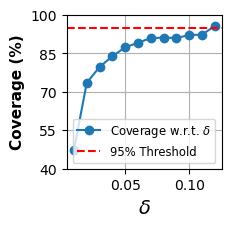

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the folder path containing the CSV files
folder_path = "coverage_visuals_2.5"  # Update this path as needed

# Initialize a list to store (x, y) points
data_points = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Ensure it's a CSV file
        # Extract x value from the filename (e.g., r0.05 from the filename)
        try:
            x_value = float(file_name.split('_')[-1][1:].replace('.csv', ''))
        except ValueError:
            print(f"Skipping file {file_name} due to invalid format.")
            continue
        
        # Full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Load the CSV and compute the average of the last column
        try:
            df = pd.read_csv(file_path)
            y_value = df.iloc[:, -1].mean()  # Average of the last column
            data_points.append((x_value, y_value))
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
            continue

# Sort data points by x_value for proper plotting
data_points.sort(key=lambda x: x[0])

# Check if there are valid points
if data_points:
    # Separate x and y values for plotting
    x_values, y_values = zip(*data_points)

    # Plotting
    plt.figure(figsize=(2, 2))
    plt.plot(x_values, y_values, marker='o', linestyle='-', label='Coverage w.r.t. $\delta$')
    plt.axhline(y=95, color='red', linestyle='--', linewidth=1.5, label='95% Threshold')  # Add red threshold line
    plt.xlabel('$\delta$', fontsize=14, fontweight='bold')
    plt.ylabel('Coverage (%)', fontsize=11, fontweight='bold')
    plt.grid(True)
    plt.legend(fontsize='small')
    
    # Cap the y-axis at 100 and set interval to 5
    plt.ylim(45, 100)
    plt.yticks(range(40, 101, 15))
    # Save the figure as a tight PDF
    output_pdf_path = "tuning_delta_toy.pdf"  # Set desired PDF file name
    plt.savefig(output_pdf_path, format='pdf', bbox_inches='tight')
    # Put show before output the figure otherwise the output gonna be blank
    plt.show()
else:
    print("No valid data points found for plotting.")
